### Imports

In [21]:
import os
import pandas as pd
import numpy as np
from csv import writer
import cv2
import matplotlib.pyplot as plt

### Loading Data into Text and CSV Files

In [22]:
# taking the path of the dataset 
# TODO: change the path from absolute to relative path - not working with the latter for some reason
folder = "/Users/reeteshsudhakar/Documents/GitHub/utk-image-classifier/utkface-images"

files = os.listdir(folder)
print(len(files))
# grabbing the info from each file name and printing it  

# opening the text file and csv file and writing the data to it as needed
with open("image_data.csv", "w") as csvfile:
    file_writer = writer(csvfile)
    file_writer.writerow(["Age", "Gender", "Race", "Date & Time"])
    for file in files:
        output_list = []
        file = file.strip(".jpg.chip.jpg")
        
        for item in file.split("_"):
            output_list.append(item)
        
        file_writer.writerow(output_list)
    
    csvfile.close()

# NOTE: the text file isn't being used in the current version of the code, only the CSV file is being used

23708


### Image Labels
The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

**age** is an integer from 0 to 116, indicating the age

**gender** is either 0 (male) or 1 (female)

**race** is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

**date&time** is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

### Dataframe Testing

In [23]:
# converting data from csv to dataframe
df = pd.read_csv("image_data.csv")

# printing the entire dataframe
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

# df -- only prints the first and last five rows (head and tail)

       Age  Gender               Race  Date & Time
0        9       1                  2    2.016e+16
1       36       0                  1    2.017e+16
2       86       1                  0    2.017e+16
3       26       1                  0    2.017e+16
4        1       1                  2    2.016e+16
5       52       0                  1    2.017e+16
6       25       1                  0    2.017e+16
7       16       0                  0    2.017e+16
8       27       0                  3    2.017e+16
9       36       0                  3    2.017e+16
10      58       0                  2    2.017e+16
11       6       1                  0    2.017e+16
12      35       1                  2    2.017e+16
13       1       1                  3    2.016e+16
14      26       1                  1    2.017e+16
15       2       0                  2    2.016e+16
16      53       1                  0    2.017e+16
17      35       0                  3    2.017e+16
18      23       1             

In [24]:
# grabbing data from the dataframe and placing into lists
ages = df["Age"].to_list()
genders = df["Gender"].to_list()
races = df["Race"].to_list()
images = []

print(len(ages))
print(len(genders))
print(len(races))

23708
23708
23708


In [25]:
for file in files:
    total = folder + '/' + file
    image = cv2.imread(total)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)
    
print(len(images))

23708


In [26]:
# checking to ensure the lists were generated from the dataframe correctly
print(ages[0])
print(genders[0])
print(races[0])

9
1
2


In [27]:
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [28]:
np.save('image.npy',images_f)
np.save('gender.npy',genders_f)
np.save('age.npy',ages_f)

In [29]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


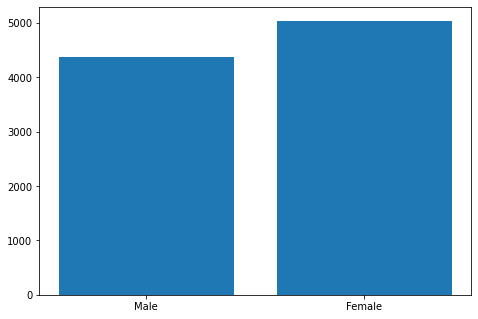

In [30]:
figure = plt.figure()
ax = figure.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values = [4372,5047]
ax.bar(gender,values)
plt.show()

In [31]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


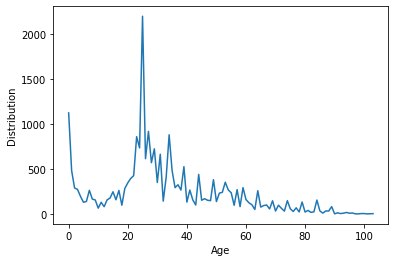

In [32]:
val = values.tolist()
cnt = counts.tolist()
plt.plot(counts)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show()

In [33]:
labels = []

i = 0
while i < len(ages):
  label = []
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i += 1

# print(labels)

In [34]:
images_f_2 = images_f/255
labels_f = np.array(labels)
images_f_2.shape

(23708, 48, 48, 3)

In [35]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(images_f_2, labels_f,test_size=0.25)